In [1]:
import datetime
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from functools import partial

from utils import Scale
from utils import find_set_sunset, find_set_sunrise
from utils import location_station
from utils import plot_sunrise_and_sunset

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')
lat, long = location_station('sj2')

In [3]:
df_resample = df.resample('D').mean()

Text(0.5, 0, 'UT')

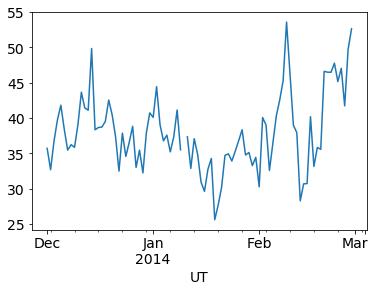

In [4]:
df_resample['vtec'].plot()
plt.xlabel('UT')

Text(0.5, 0, 'UT')

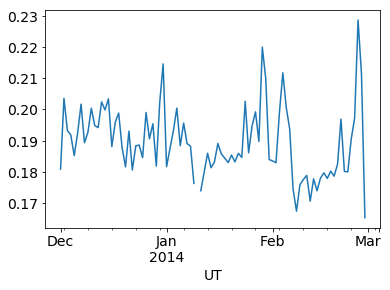

In [5]:
df_resample['s4'].plot()
plt.xlabel('UT')

In [6]:
df.head(8)

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,s4
2013-12-01 03:30:00,33.624428,-0.428246,-0.020502,-3.216613,0.002355,1.826065,1.991653,0.163334
2013-12-01 03:40:00,33.205025,-0.546589,-0.118343,-3.122300,0.130198,4.588494,2.530373,0.165397
2013-12-01 03:50:00,32.539631,-0.772594,-0.226005,-2.810556,0.280756,7.786990,2.862830,0.168683
2013-12-01 04:00:00,31.469337,-1.082859,-0.310265,-2.320938,0.399753,10.972091,2.894375,0.173552
2013-12-01 04:10:00,29.995466,-1.429647,-0.346788,-1.764129,0.443303,13.734955,2.621609,0.178917
2013-12-01 04:20:00,28.194797,-1.748643,-0.318996,-1.279775,0.399478,15.846379,2.116655,0.183615
2013-12-01 04:30:00,26.140187,-1.970060,-0.221417,-0.971635,0.295367,17.265745,1.481490,0.186186
2013-12-01 04:40:00,23.954667,-2.040046,-0.069986,-0.856185,0.185794,18.030494,0.804197,0.186092


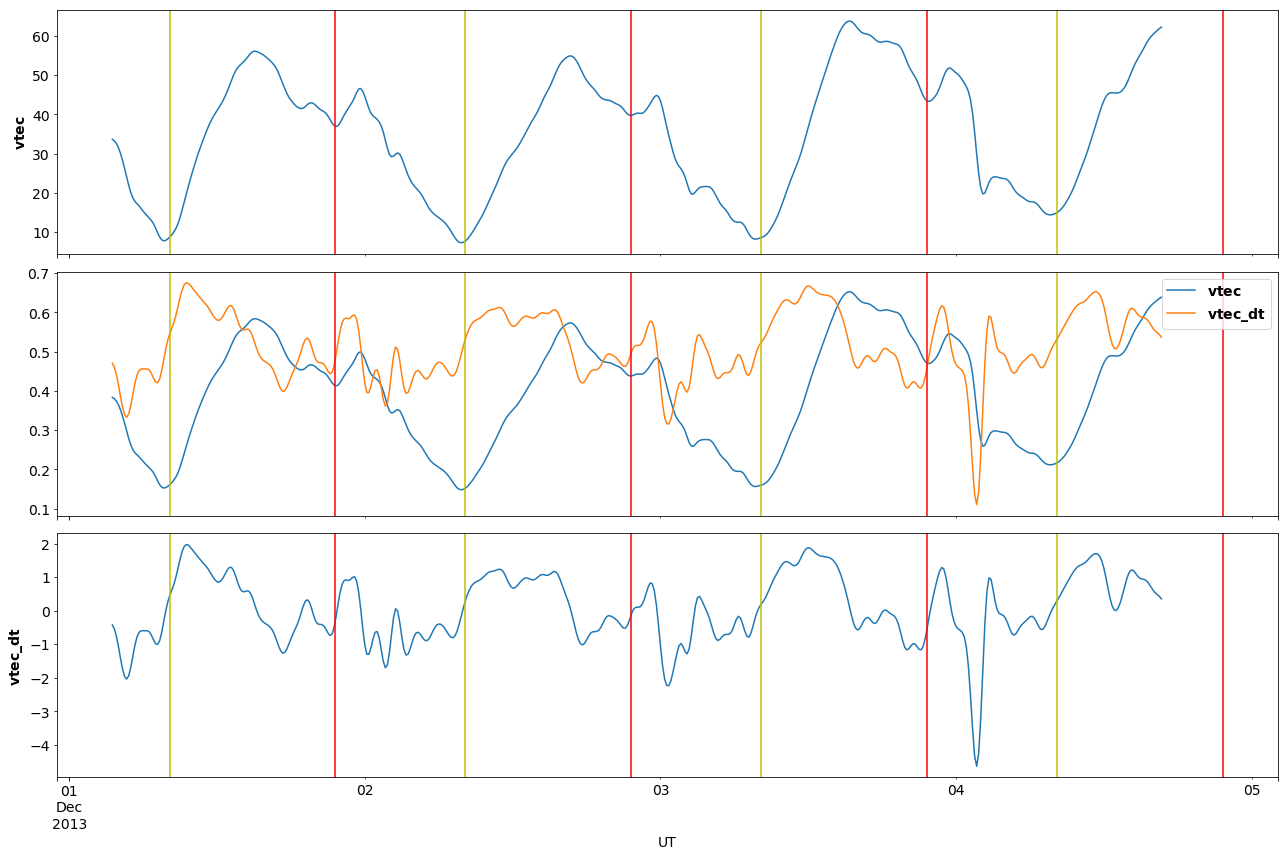

In [7]:
a = 0
b = 512

fig, ax = plt.subplots(3, 1, sharex=True)
figsize=(18, 12)
df['vtec'][a:b].plot(figsize=figsize, ax=ax[0])
df['vtec_dt'][a:b].plot(figsize=figsize, ax=ax[2])

vtec_min = df['vtec'].min()
vtec_max = df['vtec'].max()
scale_vtec = Scale(vtec_min, vtec_max)
vtec_scale = pd.Series(scale_vtec(df['vtec'].values), index=df.index.values)

vtec_dt_min = df['vtec_dt'].min()
vtec_dt_max = df['vtec_dt'].max()
scale_vtec_dt = Scale(vtec_dt_min, vtec_dt_max)
vtec_dt_scale = pd.Series(scale_vtec_dt(df['vtec_dt'].values), index=df.index.values)

vtec_scale[a:b].plot(figsize=figsize, ax=ax[1], label=r"$\bf vtec$") 
vtec_dt_scale[a:b].plot(figsize=figsize, ax=ax[1], label=r"$\bf vtec\_dt$")
ax[1].legend(loc="upper right")

ax[0].set(ylabel=r"$\bf vtec$")
ax[2].set(ylabel=r"$\bf vtec\_dt$")
ax[2].set(xlabel=r"UT")

plot_sunrise_and_sunset('sj2', df[a:b], ax)

fig.tight_layout()
plt.show()